# Assignment 4: GMM  Hard Allocation
 

In [1]:
#Libraries required for my code to run

#Uncomment this if you want to display your [graphs] within the notebook in a proper format.
%matplotlib inline
#Uncomment this if you want to display your graphs in backend


import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from pandas import DataFrame
import pandas as pd
import numpy as np
from numpy.random import randn
import glob
import sys

import warnings
warnings.filterwarnings('ignore')


1.Synthetic Data Generation first method

[-3.56634290e-03  3.94727848e+00]


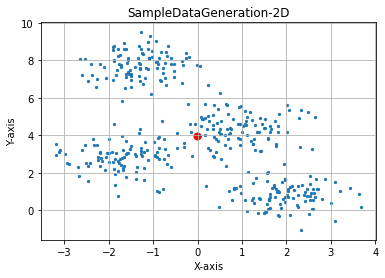

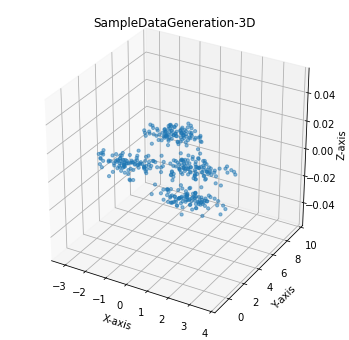

Text(0.5, 1.0, 'Histogram')

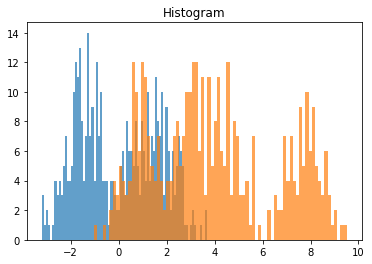

In [2]:
#Synthetic Data Generation first method

K=4 # Step1:Choose the Number of clusters
#%matplotlib
from sklearn.datasets.samples_generator import make_blobs
Data, y_true = make_blobs(n_samples=400, centers=K,
                       cluster_std=0.70, random_state=0)

df = pd.DataFrame(data=Data, columns=["X", "Y"])
#Plot 2D

plt.scatter(Data[:, 0], Data[:, 1], s=5)

    
centers = df.mean(0)
Initial_Centroid=centers.to_numpy()
print(Initial_Centroid)

plt.scatter(centers['X'],centers['Y'],c='red', s=50)
plt.title("SampleDataGeneration-2D")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()
#plt.scatter(centers[:, 0], centers[:, 1],c='red', s=50)
#plt.title("SampleDataGeneration-2D")
#plt.xlabel("X-axis")
#plt.ylabel("Y-axis")
#plt.grid()

#3D Plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Data[:, 0],Data[:, 1],
           linewidths=1, alpha=0.5,
           #edgecolor='k',
           s =10,
           )
ax.set_title("SampleDataGeneration-3D")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()


def plot_hist(data):
    for x in data:
        plt.hist(x, bins = 80, alpha = 0.7)

plot_hist([Data[:, 0], Data[:, 1]])
plt.title("Histogram")

In [3]:
def EuclideanDistance(Dataset,Centroids):
    
    from sklearn.metrics import pairwise_distances_argmin
    labels=pairwise_distances_argmin(Dataset,Centroids)
    print(labels)

    return labels
    

In [4]:


def Kmeans(X, clusters):
    # Step2. Randomly choose initial Centroids
    
    Initial_Centroids=InitialCents
    print("In",Initial_Centroids)
    clusters=len(Initial_Centroids)
    #print("Initial Centroids are:\n",Initial_Centroids)
    #I am capturing dataset in excel.Making sure if that already exists.If exists,overwrite
    #If not,create new
    import glob
    import sys
    #fileList = glob.glob('C:\dataset*.xlsx')
    j=0
    while True:       
        print("Iteration",j)
        # Step2a: Assign labels to datapoints or assign datapoints
        #to cluster based on minimum distance to the closest-centeroid
        
        labels = EuclideanDistance(X,Initial_Centroids)
        #print(labels)
        
        
        df = pd.DataFrame(data=X, columns=["X", "Y"])
        
        df['Cluster']=labels
        #Capturing my data in excel.Whoevere uses this give the path name as per your sytem settings
        #Validation part.uncomment below line.
        #df.to_excel (r'C:\dataset'+str(j)+'.xlsx', index = True, header=True)
       
        # Step3: Find new centeroids by calculating
        # Means of Datapoints belonging to the same cluster 
        
        New_Centroids = np.array([X[labels == i].mean(0)
                                for i in range(clusters)])
        print("New_Centroids\n",New_Centroids)
        #df1 = pd.DataFrame(data=New_Centroids, columns=["X", "Y"])
        
         #Capturing my centroids in excel.Whoevere uses this give the path name as per your sytem settings
        #Validation part.uncomment below line.
        #df1.to_excel (r'C:\Centroids'+str(j)+'.xlsx', index = True, header=True)
        
        # Step4: Check if previous-centroids and new-centroids are equal
        #print(centers)
        #print(new_centers)
        import warnings
        warnings.filterwarnings('ignore')
        if np.all((Initial_Centroids == New_Centroids)):
            break
        j=j+1    
        Initial_Centroids = New_Centroids
       
    
    return New_Centroids, labels


#print(centers)
#print(labels)
        
        


# Binary Split Initialization

In [5]:
count=0
while True:
    
    print("IterationBinarySplit",count)
   
    c=[]
    #size=Initial_Centroid.ndim
    print(Initial_Centroid)
    for i in range(1):
        InitialCentroid1=Initial_Centroid+0.002
        cent=c.append(InitialCentroid1)
        InitialCentroid2=Initial_Centroid-0.002
        cent=c.append(InitialCentroid2)
    InitialCents=np.vstack(c)  
    print("My BinarySplit Centroid of size",len(InitialCents))
    print(InitialCents)
    sie=len(InitialCents)
    if(sie==2*K):
        print("\n\nSince the size of centroids after binary split is twice the number of clusters")
        print("\nHence,exit the code as i met with my convergence criteria!!")
        break
    
    
    print(sie)
    condtn=2*K
    #print(condtn)
    print("\nEntering into Kmeans algorithm")
    Codebook,labels = Kmeans(Data,K)
        #print(Codebook)
    Initial_Centroid=Codebook
        #print(Initial_Centroid)
    centcount=len(Codebook)
    print(centcount)
   
    
    if(sie!=(2*K)):
        
    
        Codebook=Initial_Centroid
        count=count+1 
        print(count)
        continue
       
        
    else:
        break
        
print("\n\nMy final Converged centroids are:",Codebook)     
       
               


IterationBinarySplit 0
[-3.56634290e-03  3.94727848e+00]
My BinarySplit Centroid of size 2
[[-1.56634290e-03  3.94927848e+00]
 [-5.56634290e-03  3.94527848e+00]]
2

Entering into Kmeans algorithm
In [[-1.56634290e-03  3.94927848e+00]
 [-5.56634290e-03  3.94527848e+00]]
Iteration 0
[0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0
 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1
 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1
 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0
 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1
 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0
 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 

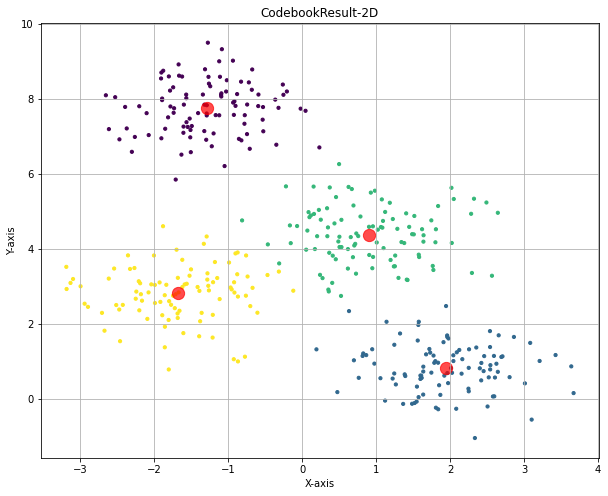

In [6]:
plt.figure(figsize = (10,8))
plt.scatter(Data[:, 0], Data[:, 1],s=10,c=labels,cmap='viridis');
plt.scatter(Codebook[:, 0], Codebook[:, 1], c='Red', s=150, alpha=0.7);
plt.title("CodebookResult-2D")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()

In [7]:
j=0
X=[]

for i in range(K):
    Data1= np.array(Data[labels == i])
    X.append(Data1)
    print("Data"+str(j),Data1)
    j=j+1
X=np.vstack(X)    
#print("KMeans:",X)
#print(X.shape[1])

Data0 [[-1.77876538  7.80040115]
 [-0.89961909  7.81712545]
 [-2.07259605  7.0373226 ]
 [-2.25971391  6.98807992]
 [-0.52416885  7.13811117]
 [-1.31944387  7.84895558]
 [-0.53300236  7.44868154]
 [-1.40523703  7.6238852 ]
 [-1.54552009  7.2544848 ]
 [-1.34059182  8.11879328]
 [-0.31880789  7.76456298]
 [-0.58961344  8.11910287]
 [-0.92193928  7.57629031]
 [ 0.23349794  6.70784513]
 [-1.6020066   7.26440594]
 [-1.70778035  5.85127186]
 [-1.10967867  8.59281467]
 [-1.6035181   7.09914394]
 [-1.7293651   7.75322783]
 [-0.26043533  8.38552269]
 [-0.01976547  7.74236812]
 [-1.51085876  6.97712268]
 [-2.61024793  7.19651157]
 [-1.26465195  8.59089633]
 [-1.89163519  7.97038771]
 [-0.70736939  6.67234121]
 [-1.02624334  8.19948845]
 [-1.56197153  7.38092347]
 [ 0.0464581   7.68554336]
 [-1.90117441  6.95131217]
 [-1.5641679   8.0214416 ]
 [-2.20010228  7.80647945]
 [-1.28926636  7.61317985]
 [-1.5659186   8.11774519]
 [-1.62114773  8.59898483]
 [-0.82467172  8.46234921]
 [-1.22041906  6.73856

------------------------------------------------------------------------------------------------------
<h2>-----------------------------------------------------------------------------------------</h2>
 <h2>GMM Begins from here</h2>
-------------------------------------------------------------------------------------------------


In [8]:
#Here i am calculating the parameters of Kmeans clusters required for GMM
X=Data
def calculate_mean_covariance_weight(X, prediction):
    C = K
    d = X.shape[1]
    
    gaussians= np.unique(prediction)
    
    initial_means = np.zeros((C, d))
    initial_cov = np.zeros((C, d, d))
    initial_pi = np.zeros(C)
        
    counter=0
    for label in sorted(gaussians):
        ids = np.where(prediction == label) # returns indices
        print("Ids of class/label"+str(counter),ids)
        initial_pi[counter] = len(ids[0]) / X.shape[0] 
        print(initial_pi[counter])
        initial_means[counter,:] = np.mean(X[ids], axis = 0)
        de_meaned = X[ids] - initial_means[counter,:]
        Nk = X[ids].shape[0]
        print(Nk,X.shape[0])
        initial_cov[counter,:, :] = np.dot(initial_pi[counter] * de_meaned.T, de_meaned) / Nk
        counter+=1
       
    assert np.sum(initial_pi) == 1
    return (initial_means, initial_cov, initial_pi)
    

prediction = labels

m, c, pi = calculate_mean_covariance_weight(X, prediction)
print("Initial mean:",m)
print("Initial Covariance matrix",c)
print("Initial pi/weight counter:",pi)

Ids of class/label0 (array([  5,  10,  22,  25,  26,  35,  41,  45,  49,  50,  51,  53,  54,
        69,  73,  78,  83,  95, 100, 105, 107, 114, 116, 118, 119, 123,
       125, 130, 131, 132, 136, 138, 143, 154, 162, 165, 169, 170, 171,
       172, 179, 181, 184, 186, 189, 192, 194, 195, 196, 204, 207, 209,
       214, 217, 219, 222, 227, 229, 234, 243, 246, 254, 255, 259, 264,
       273, 276, 280, 283, 284, 285, 300, 301, 303, 307, 308, 312, 317,
       325, 327, 330, 332, 340, 345, 352, 359, 360, 361, 369, 374, 376,
       377, 379, 381, 386, 387, 388, 389, 391], dtype=int64),)
0.2475
99 400
Ids of class/label1 (array([  6,   9,  11,  15,  17,  29,  36,  38,  42,  44,  46,  47,  48,
        57,  58,  60,  61,  62,  63,  66,  74,  82,  89,  91,  97,  98,
        99, 101, 108, 115, 120, 122, 126, 127, 128, 145, 148, 150, 152,
       156, 166, 167, 173, 174, 175, 197, 198, 202, 203, 212, 213, 215,
       218, 226, 235, 237, 240, 244, 248, 251, 258, 270, 275, 277, 278,
       279, 281, 

In [9]:
from scipy.stats import multivariate_normal
X=Data

class GaussianMixture():
    #Here you will create a refernce to all the parameters which gets substituted against declared variables
    def __init__(self, gaussians: int, n_iters: int, tol: float, seed: int):
        self.gaussians = gaussians
        self.n_iters = n_iters
        self.tol = tol
        self.seed = seed

    def fit(self, X):

        # data's dimensionality and probability vector initialization
        self.n_row, self.n_col = X.shape     
        self.probability = np.zeros((self.n_row, self.gaussians))
        
        #print(self.probability)
        
        ##Below multicommented block can be used if you want to apply GMM on a dataset without Kmeans result
        
        """
        # initialize parameters
        np.random.seed(self.seed)
        chosen = np.random.choice(self.n_row, self.gaussians, replace = False)
        #print("Chosen:",chosen)
        self.means = X[chosen]
        #print("Initial Means:",self.means)
        self.weights = np.full(self.gaussians, 1 / self.gaussians)
        #print("Initial weights:",self.weights)
        
        # for np.cov, rowvar = False, 
        # indicates that the rows represents obervation
        shape = self.gaussians, self.n_col, self.n_col
        self.covs = np.full(shape, np.cov(X, rowvar = False))
       # print("Initial Covariance:",self.covs)
        """
        self.means=m
        self.weights=pi
        self.covs=c
        

        log_likelihood = 0 #Initializing for iteration
        self.converged = False
        self.log_likelihood_trace = []      
        print("...Entering GMM Clustering...\n")
        for i in range(self.n_iters):
            
            log_likelihood_new = self.Estep(X)
            self.Mstep(X)
            

            if  (abs(log_likelihood_new - log_likelihood) <= self.tol):
                
                self.converged = True
                break
  
            log_likelihood = log_likelihood_new
            self.log_likelihood_trace.append(log_likelihood)
            print("Iteration: ",i,"  log_likelihood: ", log_likelihood)
        
        plt.plot(self.log_likelihood_trace)
        plt.title("Loglikelihood Convergence Graph")
        
        
        #print("log_likelihood_trace:",self.log_likelihood_trace)
        last=self.log_likelihood_trace[-1]
        #print(last)

        return self.means,self.weights,self.covs,self.probability

    def Estep(self, X):
        """
        E-step: compute probability,
        update probability matrix so that probability[i, j] is the probability of cluster k 
        for data point i,
        to compute likelihood of data point i belonging to given cluster k, 
        use multivariate_normal.pdf
        """
        self._compute_log_likelihood(X)
        
        self.log_likelihood1 = np.sum(np.log(np.sum(self.probability, axis = 1)))
        
         #Normalization       
        self.probability = self.probability / self.probability.sum(axis = 1, keepdims = 1)
        #print("Normalised probability",self.probability)
        return self.log_likelihood1

    def _compute_log_likelihood(self, X):
        for k in range(self.gaussians):
            
                prior = self.weights[k]
                #print("prior_weight",prior)
                likelihood = multivariate_normal(self.means[k], self.covs[k]).pdf(X)
                #print("Likelihood/probability"+str(k),likelihood)
                self.probability[:, k] = prior * likelihood
                #print(" Size of Initial Probability of all the datapoints in cluster"+str(k),self.probability.shape)          

        return self



    def compute_log_likelihood(self, X):
        self.probs = np.zeros((X.shape[0] , self.gaussians))
        
        for k in range(self.gaussians):

            prior = self.weights[k]            
            #print("prior_weight",prior)
            self.likeli = multivariate_normal(self.means[k], self.covs[k]).pdf(X)
            #print("Likelihood/probability"+str(k),likelihood)

            self.probs[:,k]= prior * self.likeli
            #print(" Size of Initial Probability of all the datapoints in cluster"+str(k),self.probability.shape)       

        self.probs = self.probs / (np.sum(self.probs, axis=1)[:, np.newaxis])
        
        return self.probs



    def compute_log_likelihood_newmean(self, X, nmean, nvar, nweights):
        self.probs1 = np.zeros((X.shape[0], self.gaussians))
        
        for k in range(self.gaussians):

            prior = nweights[k]
            #print("prior_weight",prior)
            self.likeli = multivariate_normal(nmean[k], nvar[k]).pdf(X)
            #print("Likelihood/probability"+str(k),likelihood)

            self.probs1[:,k]= prior * self.likeli
            #print(" Size of Initial Probability of all the datapoints in cluster"+str(k),self.probability.shape)
       

        self.probs1 = self.probs1 / (np.sum(self.probs1, axis=1)[:, np.newaxis])
        
        return self.probs1


    def Mstep(self, X):
        """M-step, update parameters"""

        # total probability assigned to each cluster, Soft alocation(N^soft)
        #print("probability assigned to each cluster",self.probability.sum(axis = 0))
        resp_weights = self.probability.sum(axis = 0)
        
        # updated_weights
        self.weights = resp_weights / X.shape[0]

        # updated_means
        weighted_sum = np.dot(self.probability.T, X)
        self.means = weighted_sum / resp_weights.reshape(-1, 1)
        # updated_covariance
        for k in range(self.gaussians):
            diff = (X - self.means[k]).T
            weighted_sum = np.dot(self.probability[:, k] * diff, diff.T)
            self.covs[k] = weighted_sum / resp_weights[k]
            
        return self
    
    def predict(self, X):
       
        post_proba = np.zeros((X.shape[0], self.gaussians))
        
        for c in range(self.gaussians):
            post_proba [:,c] = self.weights[c] * multivariate_normal.pdf(X, self.means[c,:], self.covs[c])
            #print("Posterior_probability:", post_proba)
        labels  =  post_proba.argmax(1)
        #print("Labels/Classes:",labels)
        
        return labels

...Entering GMM Clustering...

Iteration:  0   log_likelihood:  -1378.7671628802502
Iteration:  1   log_likelihood:  -1378.4874684770616
Iteration:  2   log_likelihood:  -1378.476462789608
Iteration:  3   log_likelihood:  -1378.4722641038302
Iteration:  4   log_likelihood:  -1378.4703670934482
Iteration:  5   log_likelihood:  -1378.4694678641827
Iteration:  6   log_likelihood:  -1378.4690343734387
Iteration:  7   log_likelihood:  -1378.4688239671102
Iteration:  8   log_likelihood:  -1378.4687215308259
Iteration:  9   log_likelihood:  -1378.4686715873274
Iteration:  10   log_likelihood:  -1378.468647218649
Iteration:  11   log_likelihood:  -1378.4686353234874
Iteration:  12   log_likelihood:  -1378.4686295155607
Iteration:  13   log_likelihood:  -1378.4686266793149
Iteration:  14   log_likelihood:  -1378.4686252941094
Iteration:  15   log_likelihood:  -1378.468624617533
Iteration:  16   log_likelihood:  -1378.4686242870555
Iteration:  17   log_likelihood:  -1378.4686241256263
Iteration:

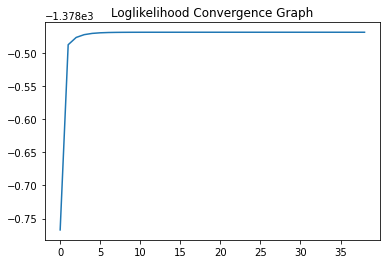

In [25]:
K=4
model = GaussianMixture(gaussians=K, n_iters = 50, tol = 0.0, seed = 4)
#fitted_values = model.fit(X)
mean,weight,covar,probability = model.fit(X)
print("Means",mean)
print("Weights",weight)
print("Covs",covar)
print("Posterior Probability:\n",probability)

UpdatedPosteriorprobability=model.compute_log_likelihood(X)
print("\nLast_Iteration_Posteriorprobability",UpdatedPosteriorprobability)
print("\nSum Of Last_Iteration_Posteriorprobability",UpdatedPosteriorprobability.sum(1))

predicted_values = model.predict(X)
print("\nClassified cluster labels\n",predicted_values)

converged iteration: 38


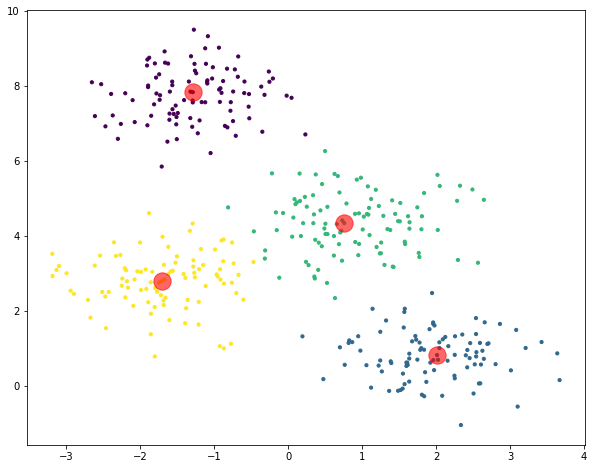

In [11]:
centers = np.zeros((K,2))
for i in range(model.gaussians):
    density = multivariate_normal(cov=model.covs[i], mean=model.means[i]).logpdf(X)
    centers[i, :] = X[np.argmax(density)]
    
plt.figure(figsize = (10,8))
plt.scatter(X[:, 0], X[:, 1],c=predicted_values ,s=10, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1],c='Red', s=300, alpha=0.6);
print('converged iteration:', len(model.log_likelihood_trace))

In [12]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))


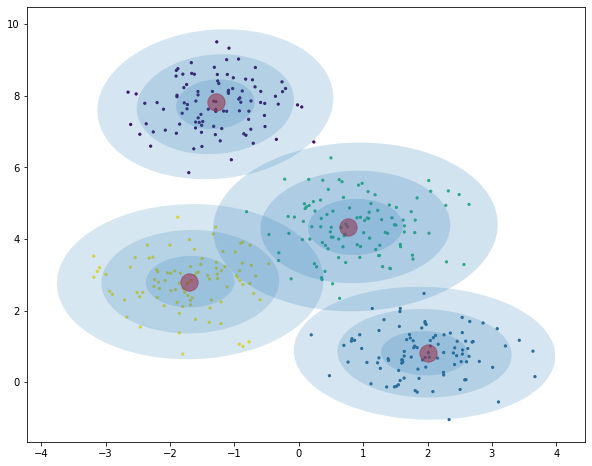

In [13]:
plt.figure(figsize = (10,8))
plt.scatter(X[:, 0], X[:, 1],c=predicted_values ,s=5, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='Red', s=300, alpha=0.6);

w_factor = 0.2 / model.weights.max()
for pos, covar, w in zip(model.means, model.covs, model.weights):
    draw_ellipse(pos, covar, alpha=w * w_factor)


In [ ]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components = 4, covariance_type = 'full', 
                      max_iter = 600, random_state = 3)

gmm.fit(X)

print('converged or not: ', gmm.converged_)



# Validation wrt original GMM 

In [ ]:

from sklearn import mixture
model = mixture.GaussianMixture(n_components=4, covariance_type='full').fit(Data)
labels = model.predict(X)
plt.figure(figsize = (10,8))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis');